In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import numpy as np
from metar import Metar
from google.colab import drive
# All the libraries needed for this part of the thesis

In [ ]:
pip install metar
# crucial for the parsing to turn into usable values for analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
#Script for scraping and processing METAR weather data for Dublin Airport (EIDW) from Ogimet.
#Steps:
#1. Scrape monthly METAR data from URLs.
#2. Parse data using the `metar` library.
#3. Calculate additional metrics (e.g. humidity).
#4. Save monthly and combine into one ordered file.
#5. Basic exploratory analysis.


# Data retrieval stage

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Final Year Project/Data/Joined Datasets')
!pwd

/content/drive/MyDrive/Final Year Project/Data/Joined Datasets


# DATA SCRAPING the weather data for each month

## This process was repeated 12 times once for each month and stored in individual csv file after being parsed using METAR

In [ ]:
# EXAMPLE URL to access the wether data will put other url in a comment below
url = "https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2025&mes=01&day=01&hora=00&anof=2025&mesf=01&dayf=31&horaf=23&minf=59&send=send"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Make the request with headers
response = requests.get(url, headers=headers)

# Parse the pages content
soup = BeautifulSoup(response.text, 'html.parser')

# Extract METAR strings from all of the <pre> tags
metar_strings = [td.get_text().strip() for td in soup.find_all('pre')]

# Verify scraped METAR values by the count and the display of first 5
print(f"Total METARs found: {len(metar_strings)}")
print("First few METARs:", metar_strings[:5])




Total METARs found: 1649
First few METARs: ['METAR EIDW 010000Z 25010KT 210V290 9999 -RA FEW007 SCT011 BKN035 07/05 Q1002 NOSIG=', 'METAR EIDW 010030Z 26011KT 8000 -RA FEW011 SCT016 BKN040 06/05 Q1002 NOSIG=', 'METAR EIDW 010100Z 26012KT 230V290 8000 -RA FEW011 SCT014 BKN025 06/05 Q1001 NOSIG=', 'METAR EIDW 010130Z 26014KT 8000 -RA FEW011 SCT014 BKN025 06/04 Q1001 NOSIG=', 'METAR EIDW 010200Z 26014KT 8000 -RA FEW011 SCT014 BKN030 06/04 Q1001 NOSIG=']


\ March 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=REV&nil=SI&fmt=html&ano=2024&mes=03&day=01&hora=00&anof=2024&mesf=03&dayf=31&horaf=23&minf=59&send=send,

April 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=04&day=01&hora=00&anof=2024&mesf=04&dayf=30&horaf=23&minf=59&send=send,

May 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=05&day=01&hora=00&anof=2024&mesf=05&dayf=31&horaf=23&minf=59&send=send,

June 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=06&day=01&hora=00&anof=2024&mesf=06&dayf=30&horaf=23&minf=59&send=send,

July 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=07&day=01&hora=00&anof=2024&mesf=07&dayf=31&horaf=23&minf=59&send=send,

August 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=08&day=01&hora=00&anof=2024&mesf=08&dayf=31&horaf=23&minf=59&send=send,

September 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=09&day=01&hora=00&anof=2024&mesf=09&dayf=30&horaf=23&minf=59&send=send,

October 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=10&day=01&hora=00&anof=2024&mesf=10&dayf=31&horaf=23&minf=59&send=send,

November 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=11&day=01&hora=00&anof=2024&mesf=11&dayf=30&horaf=23&minf=59&send=send,

December 2024 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=12&day=01&hora=00&anof=2024&mesf=12&dayf=31&horaf=23&minf=59&send=send

January 2025 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2025&mes=01&day=01&hora=00&anof=2025&mesf=01&dayf=31&horaf=23&minf=59&send=send

February 2025 - https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=REV&nil=SI&fmt=html&ano=2025&mes=02&day=01&hora=00&anof=2025&mesf=02&dayf=28&horaf=23&minf=59&send=send

This is the list of the links to the weather data each parsed individually

In [ ]:
# humidity function
def calculate_humidity(temp, dew_point):
    if temp == "N/A" or dew_point == "N/A":
        return "N/A"
    return round(100 * (np.exp((17.625 * dew_point) / (243.04 + dew_point)) / np.exp((17.625 * temp) / (243.04 + temp))), 2)
# The values are from Magnus-Tetens approximation used to calculate the relative humidity.

In [1]:
data = []

# runs a loop for every string stored the scraping and parses it into the respective values below
for metar_string in metar_strings:
    try:
        metar = Metar.Metar(metar_string)  # Parse METAR data

# Ensuring date-time formatting correctly
        observation_time = metar.time.replace(tzinfo=None).strftime('%Y-%m-%d %H:%M:%S') if metar.time else "N/A"

        data.append({
            "Station": metar.station_id,
            "Observation Time": observation_time,
            "Wind Speed (KT)": metar.wind_speed.value("KT") if metar.wind_speed else "N/A",
            "Visibility (m)": metar.vis.value("m") if metar.vis else "N/A",
            "Temperature (C)": metar.temp.value("C") if metar.temp else "N/A",
            "Dew Point (C)": metar.dewpt.value("C") if metar.dewpt else "N/A",
            "Pressure (hPa)": metar.press.value("hPa") if metar.press else "N/A",
            "Humidity (%)": calculate_humidity(metar.temp.value("C"), metar.dewpt.value("C")) if metar.temp and metar.dewpt else "N/A",
        })
    except Exception as e:
        print("Error parsing METAR:", e)

# Converted METAR data to DataFrame
df = pd.DataFrame(data)

# Making sure Observation Time column is treated as datetime format
df["Observation Time"] = pd.to_datetime(df["Observation Time"], errors='coerce')

# stores into the respective month that is being done at the time
df.to_csv("January_Metar.csv", index=False)

# Display first few rows to verify
print(df.head())


NameError: name 'metar_strings' is not defined

# If want to join all at the same time

In [ ]:
# Function to calculate relative humidity
def calculate_humidity(temp, dew_point):
    if temp == "N/A" or dew_point == "N/A":
        return "N/A"
    return round(100 * (np.exp((17.625 * dew_point) / (243.04 + dew_point)) /
                        np.exp((17.625 * temp) / (243.04 + temp))), 2)

# List of URLs to scrape METAR data from
urls = ["https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=SA&ord=DIR&nil=SI&fmt=html&ano=2024&mes=01&day=01&hora=00&anof=2024&mesf=01&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=SA&ord=DIR&nil=SI&fmt=html&ano=2024&mes=02&day=01&hora=00&anof=2024&mesf=02&dayf=29&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=REV&nil=SI&fmt=html&ano=2024&mes=03&day=01&hora=00&anof=2024&mesf=03&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=04&day=01&hora=00&anof=2024&mesf=04&dayf=30&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=05&day=01&hora=00&anof=2024&mesf=05&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=06&day=01&hora=00&anof=2024&mesf=06&dayf=30&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=07&day=01&hora=00&anof=2024&mesf=07&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=08&day=01&hora=00&anof=2024&mesf=08&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=09&day=01&hora=00&anof=2024&mesf=09&dayf=30&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=10&day=01&hora=00&anof=2024&mesf=10&dayf=31&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=11&day=01&hora=00&anof=2024&mesf=11&dayf=30&horaf=23&minf=59&send=send",
"https://www.ogimet.com/display_metars2.php?lang=en&lugar=EIDW&tipo=ALL&ord=DIR&nil=SI&fmt=html&ano=2024&mes=12&day=01&hora=00&anof=2024&mesf=12&dayf=31&horaf=23&minf=59&send=send"
]

data = []  # Store parsed METAR data

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract METAR strings from <pre> tags
    metar_strings = [pre.get_text().strip() for pre in soup.find_all('pre')]

    for metar_string in metar_strings:
        try:
            metar = Metar.Metar(metar_string)  # Parse METAR data
            temp_c = metar.temp.value("C") if metar.temp else "N/A"
            dew_c = metar.dewpt.value("C") if metar.dewpt else "N/A"

            data.append({
                "Station": metar.station_id,
                "Observation Time": metar.time.strftime('%Y-%m-%d %H:%M:%S') if metar.time else "N/A",
                "Wind Speed (KT)": metar.wind_speed.value("KT") if metar.wind_speed else "N/A",
                "Visibility (m)": metar.vis.value("m") if metar.vis else "N/A",
                "Temperature (C)": temp_c,
                "Dew Point (C)": dew_c,
                "Humidity (%)": calculate_humidity(temp_c, dew_c),
                "Pressure (hPa)": metar.press.value("hPa") if metar.press else "N/A",
            })
        except Exception as e:
            print("Error parsing METAR:", e)

# Convert to DataFrame and append to CSV
df = pd.DataFrame(data)
df.to_csv("metar_data.csv", mode='a', index=False, header=not pd.io.common.file_exists("metar_data.csv"))

print("CSV file updated successfully with new METAR data!")


NameError: name 'requests' is not defined

JOINING THE 12 DATASETS TOGETHER AND ORDERING THEM BY DATE AND TIME

In [ ]:
# Opens the folder that contains all 12 months worth of weather values
folder_path = "/content/drive/MyDrive/Final Year Project/Data/weather data"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all CSVs
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
#join all the csv files in the folder - the weather data is the only ones in there
merged_df = pd.concat(df_list, ignore_index=True)

# merged file saved
merged_df.to_csv("/content/drive/MyDrive/Final Year Project/Data/merged_output.csv", index=False)


print("All files have been merged successfully!")


In [ ]:
# merged CSV file
df = pd.read_csv("merged_output.csv")

# Convert the 'Observation Time' column to datetime format to make sure it is
df['Observation Time'] = pd.to_datetime(df['Observation Time'], dayfirst=True, errors='coerce')

# Sort by date and time satrting with the older value moving more recent as you go down
df = df.sort_values(by='Observation Time')

# sorted file
df.to_csv("/content/drive/MyDrive/Final Year Project/Data/sorted_output.csv", index=False)

print("File sorted successfully!")


# EDA OF THE WEATHER DATA SET BY ITSELF

## Test for Null values and perform basic analysis of the completed data set

In [ ]:
df = pd.read_csv("sorted_output.csv")# inspect the final weather data set

In [ ]:
df.describe()

,Wind Speed (KT),Visibility (m),Temperature (C),Dew Point (C),Pressure (hPa),Humidity (%)
count,17485.000000,17484.000000,17485.000000,17485.000000,17485.000000,17485.000000
mean,9.351959,9481.903455,10.436031,7.313812,1013.148184,82.033902
std,4.800564,1588.817855,4.739675,4.150365,12.342986,11.845591
min,0.000000,200.000000,-5.000000,-6.000000,968.000000,42.030000
25%,6.000000,10000.000000,7.000000,4.000000,1006.000000,75.520000
50%,9.000000,10000.000000,11.000000,8.000000,1014.000000,82.510000
75%,12.000000,10000.000000,14.000000,10.000000,1022.000000,93.140000
max,44.000000,10000.000000,25.000000,19.000000,1042.000000,106.950000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17485 entries, 0 to 17484
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station           17485 non-null  object 
 1   Observation Time  17485 non-null  object 
 2   Wind Speed (KT)   17485 non-null  int64  
 3   Visibility (m)    17484 non-null  float64
 4   Temperature (C)   17485 non-null  int64  
 5   Dew Point (C)     17485 non-null  int64  
 6   Pressure (hPa)    17485 non-null  int64  
 7   Humidity (%)      17485 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
Station,0
Observation Time,0
Wind Speed (KT),0
Visibility (m),1
Temperature (C),0
Dew Point (C),0
Pressure (hPa),0
Humidity (%),0


In [ ]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

# Get the index of the rows with null values
null_indices = null_rows.index
print("Indices of rows with null values:", null_indices)

     Station     Observation Time  Wind Speed (KT)  Visibility (m)  \
3713    EIDW  2024-05-17 10:30:00               11             NaN   

      Temperature (C)  Dew Point (C)  Pressure (hPa)  Humidity (%)  
3713               15             12            1010         82.26  
Indices of rows with null values: Index([3713], dtype='int64')


In [ ]:
df = df.drop(null_indices)

REMOVING THE NULL ROW IN THE DATASET ONLY ONE VALUE

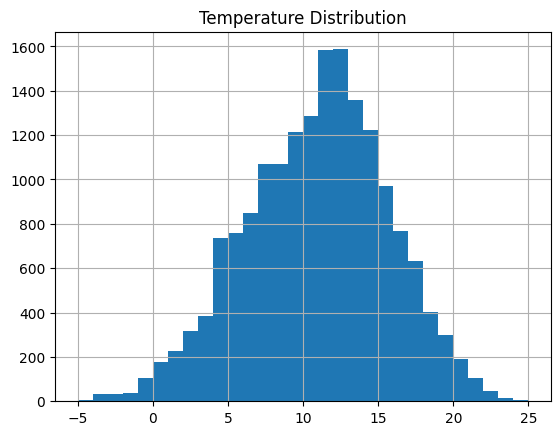

In [ ]:
df['Temperature (C)'].hist(bins=30)
plt.title("Temperature Distribution")
plt.show()


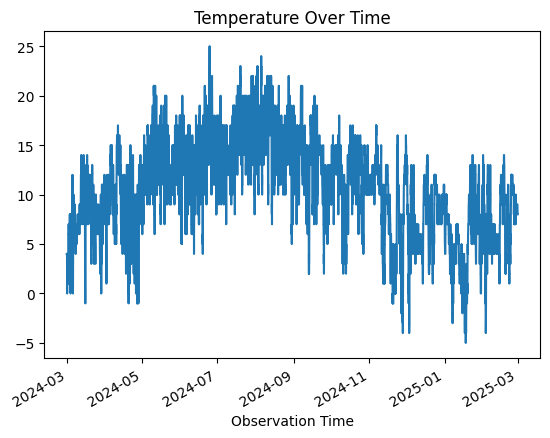

In [ ]:
df['Observation Time'] = pd.to_datetime(df['Observation Time'])
df.set_index('Observation Time', inplace=True)
df['Temperature (C)'].plot()
plt.title("Temperature Over Time")
plt.show()


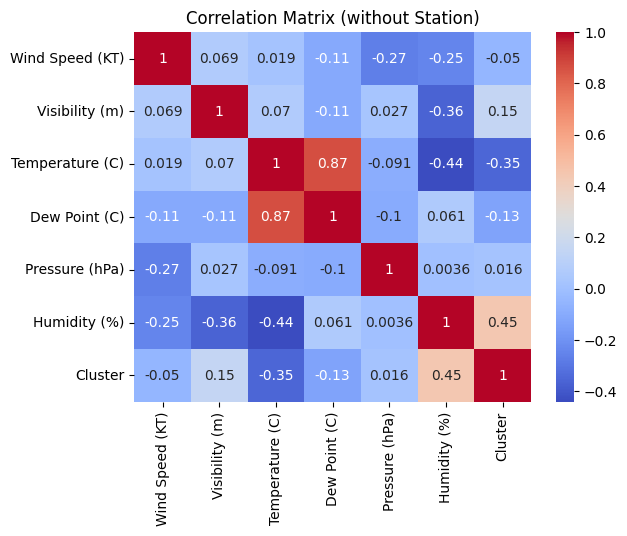

In [ ]:
corr = df.drop('Station', axis=1).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
